In [24]:
from pandas_datareader import data
import matplotlib.pyplot as plt, mpld3
import pandas as pd
import datetime
# import plotly.graph_objects as go

<h1 style="color: #5f5fef;"> Getting Data </h1>

#### with ticker

In [25]:
# Define the instruments to download. We would like to see Apple, Microsoft and the S&P500 index.
tickers = ['AAPL', 'MSFT', '^GSPC']

# We would like all available data from 10 month back (approx ~) 

# end_date = datetime.datetime(2019, 10,19)
end_date = datetime.datetime.now()
start_date = end_date - datetime.timedelta(days=(30 * 10))

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
df = data.DataReader('AAPL', 'yahoo', start_date, end_date)

In [15]:
# Testing Area: ->

df
# df.shape

High         Low        Open       Close      Volume  \
Date                                                                     
2019-07-02  203.130005  201.360001  201.410004  202.729996  16935200.0   
2019-07-03  204.440002  202.690002  203.279999  204.410004  11362000.0   
2019-07-05  205.080002  202.899994  203.350006  204.229996  17265500.0   
2019-07-08  201.399994  198.410004  200.809998  200.020004  25338600.0   
2019-07-09  201.509995  198.809998  199.199997  201.240005  20578000.0   
...                ...         ...         ...         ...         ...   
2020-04-21  277.250000  265.429993  276.279999  268.369995  45247900.0   
2020-04-22  277.899994  272.200012  273.609985  276.100006  29264300.0   
2020-04-23  281.750000  274.869995  275.869995  275.029999  31203600.0   
2020-04-24  283.010010  277.000000  277.200012  282.970001  31540300.0   
2020-04-27  284.540009  279.950012  281.799988  282.920013  13920258.0   

             Adj Close  
Date                    
2019-07-02  200.881363  
2019-07-03  202.546051  
2019-07-05  202.367676  
2019-07-08  198.196075  
2019-07-09  199.404968  
...                ...  
2020-04-21  268.369995  
2020-04-22  276.100006  
2020-04-23  275.029999  
2020-04-24  282.970001  
2020-04-27  282.920013  

[207 rows x 6 columns]

<h3 style="color: #0fcf5f;"> Setting Values </h1>

### adj close  & mvg avg

## Explain:
the best thing with pandas is that it already comes pre packaged with common operation you might wanna do with the data.

##### moving avg
its just a way to smooth out price over time. so as a result it will help us understand UP tren or a down trend

So,  it takes todays price and 99 of prio day prices creates an average of those. thats todays moving average

In [16]:
close = df['Close']
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()
# all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')
# close = close.reindex(all_weekdays)
# close = close.fillna(method='ffill')

In [33]:
# close_px.head(10)

# mavg.head(100) # <-- so the first 99 of the data are nana 

Date
2019-07-02           NaN
2019-07-03           NaN
2019-07-05           NaN
2019-07-08           NaN
2019-07-09           NaN
                 ...    
2019-11-14           NaN
2019-11-15           NaN
2019-11-18           NaN
2019-11-19           NaN
2019-11-20    221.225786
Name: Adj Close, Length: 100, dtype: float64

In [20]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'seaborn',
 'seaborn-talk',
 'seaborn-dark-palette',
 '_classic_test',
 'seaborn-dark',
 'seaborn-muted',
 'seaborn-poster',
 'seaborn-darkgrid',
 'seaborn-pastel',
 'seaborn-deep',
 'fivethirtyeight',
 'seaborn-colorblind',
 'Solarize_Light2',
 'seaborn-white',
 'grayscale',
 'seaborn-bright',
 'seaborn-notebook',
 'ggplot',
 'fast',
 'seaborn-paper',
 'tableau-colorblind10',
 'seaborn-ticks',
 'seaborn-whitegrid']

<h1 style="color: #0f2f1f;">Visualizing</h1>

### adj close with mvg avg

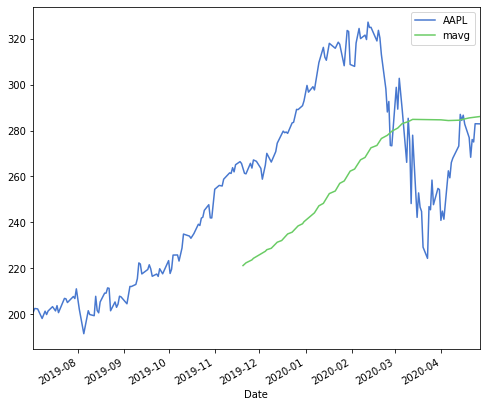

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
# style.use('seaborn-dark')
plt.tight_layout()
plt.style.use(['fast', 'seaborn-muted'])


close_px.plot(label='AAPL')
mavg.plot(label='mavg')
plt.legend()
# mpld3.display()

In [53]:
fig, ax = plt.subplots()
ax.plot(close_px.index, close_px, label="AAPL")
ax.plot(mavg.index, mavg, label="m_avg")
ax.legend()
html_text = mpld3.fig_to_html(fig)
ax.tick
mpld3.display()

In [33]:
close

Date
2019-07-02    202.729996
2019-07-03    204.410004
2019-07-05    204.229996
2019-07-08    200.020004
2019-07-09    201.240005
                 ...    
2020-04-20    276.929993
2020-04-21    268.369995
2020-04-22    276.100006
2020-04-23    275.029999
2020-04-24    282.970001
Name: Close, Length: 206, dtype: float64

<h1 style="color: #5f5fef;"> Creating Model </h1>

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

<h3 style="color: #005f0f;"> Feature Engineering </h3>

###### .HL_PCT => High-Low Percentage Change
###### .PCT_change => Pecentage Of Change 

.> High-Low Percent is positive: because there are more new highs than new lows.

.> High-Low Percent is negative (-5.19%) because there are more new lows than new highs.


> (point out at: how PCT_change changes when Adj_Close changes)

In [59]:
dfreg = df.loc[:,['Adj Close','Volume']]

# dfreg['HL_PCT'] = (df['High'] - df['Low']) * 100.0
# dfreg['PCT_change'] = (df['Close'] - df['Open']) * 100.0

dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg['PCT_change'] = (df['Close'] - df['Open']) /  df['Open'] * 100.0

dfreg.head()

Adj Close      Volume    HL_PCT  PCT_change
Date                                                    
2019-07-02  200.881363  16935200.0  0.873085    0.655376
2019-07-03  202.546051  11362000.0  0.856122    0.555886
2019-07-05  202.367676  17265500.0  1.067428    0.432746
2019-07-08  198.196075  25338600.0  1.494846   -0.393403
2019-07-09  199.404968  20578000.0  1.341680    1.024101

## " Here Is Where You Need To Focus "

here we take the previous _______forcast___out___ days data and shift the _forcast____column_ to that number and assign it to a new column named "forcast_column".

So, Basically the previous 1 percent of the data ( 60 days) will act as a label for prediction of 61 day. and thats what we will train our model on

In [36]:
import math
import numpy as np
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split


# Drop missing value
dfreg.fillna(value=-99999, inplace=True)

print(dfreg.shape)
# We want to separate 1 percent of the data to forecast
# forecast_out = int(math.ceil(0.1 * len(dfreg)))
forecast_out =60

# Separating the label here, we want to predict the AdjClose
forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
X = np.array(dfreg.drop(['label'], 1))

# Scale the X so that everyone can have the same distribution for linear regression
X = preprocessing.scale(X)

# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

# Separate label and identify it as y
y = np.array(dfreg['label'])
y = y[:-forecast_out]

print('Dimension of X',X.shape)
print('Dimension of y',y.shape)
# dfreg.head(5)
X_lately.shape
# dfreg.head()

(206, 4)
Dimension of X (146, 4)
Dimension of y (146,)


(60, 4)

In [37]:
forecast_out

60

In [38]:
# Temp Space
int(math.ceil(0.001 * len(dfreg)))

1

In [39]:
# Separation of training and testing of model by cross validation train test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [40]:
# Linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X, y)


# # Quadratic Regression 2
# clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
# clfpoly2.fit(X_train, y_train)

# # Quadratic Regression 3
# clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
# clfpoly3.fit(X_train, y_train)
    
# # KNN Regression
# clfknn = KNeighborsRegressor(n_neighbors=2)
# clfknn.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [41]:
# confidencereg = clfreg.score(X_test, y_test)
# confidencepoly2 = clfpoly2.score(X_test,y_test)
# confidencepoly3 = clfpoly3.score(X_test,y_test)
# confidenceknn = clfknn.score(X_test, y_test)

# print("The linear regression confidence is ",confidencereg)
# print("The quadratic regression 2 confidence is ",confidencepoly2)
# print("The quadratic regression 3 confidence is ",confidencepoly3)
# print("The knn regression confidence is ",confidenceknn)

In [42]:
# Printing the forecast
forecast_set = clfreg.predict(X_lately)
dfreg['Forecast'] = np.nan
dfreg.shape
# print(forecast_set, confidencereg, forecast_out)

(206, 6)

In [43]:
# dfreg.iloc[250].name
dfreg.columns
# X_lately.iloc[-1].name

Index(['Adj Close', 'Volume', 'HL_PCT', 'PCT_change', 'label', 'Forecast'], dtype='object')

In [44]:
last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_unix
#     print(next_date)
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]
     

In [45]:
# dfreg.iloc[260]
# len(dfreg)
# forecast_set
dfreg.tail(155)

Adj Close      Volume    HL_PCT  PCT_change       label  \
Date                                                                   
2019-12-09  266.288025  32010600.0  2.206648   -1.140736  289.029999   
2019-12-10  267.844330  22605100.0  1.568095   -0.044674  266.170013   
2019-12-11  270.128906  19689200.0  0.960227    0.729136  285.339996   
2019-12-12  270.817261  34327600.0  1.930299    1.374260  275.429993   
2019-12-13  274.498535  33396900.0  1.588223    1.359317  248.229996   
...                ...         ...       ...         ...         ...   
2020-06-19         NaN         NaN       NaN         NaN         NaN   
2020-06-20         NaN         NaN       NaN         NaN         NaN   
2020-06-21         NaN         NaN       NaN         NaN         NaN   
2020-06-22         NaN         NaN       NaN         NaN         NaN   
2020-06-23         NaN         NaN       NaN         NaN         NaN   

              Forecast  
Date                    
2019-12-09         NaN  
2019-12-10         NaN  
2019-12-11         NaN  
2019-12-12         NaN  
2019-12-13         NaN  
...                ...  
2020-06-19  281.018587  
2020-06-20  285.688194  
2020-06-21  281.329703  
2020-06-22  283.869446  
2020-06-23  279.787667  

[155 rows x 6 columns]

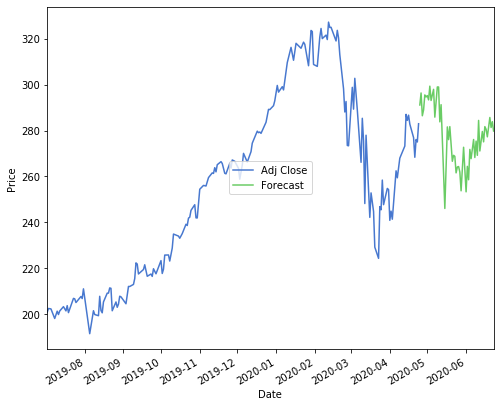

In [46]:
dfreg['Adj Close'].plot()
dfreg['Forecast'].plot()
plt.legend(loc=10)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [51]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(dfreg['Adj Close'].index, dfreg['Adj Close'], label="Adj Close")
ax.plot(dfreg['Forecast'].index, dfreg['Forecast'], label="Forecast")
ax.legend()
html_text = mpld3.fig_to_html(fig)
mpld3.display()

In [ ]:
html_text